In [1]:
import pandas as pd
import seaborn as cbs
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline

Gathering the data

In [2]:
data_dia=pd.read_csv("diabetes.csv")
data_liver=pd.read_csv("Indian Liver Patient Dataset (ILPD).csv",names=["Age","Gender","TB","DB","Alkphos","Sgpt","Sgot","TP","ALB","A/G Ratio","Outcome"])
data_breast=pd.read_csv("breast-cancer-wisconsin.data.csv",names=["id", "Clump Thickness","Uniformity of Cell Size","Uniformity of Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses","Outcome"])
data_breast=data_breast.drop("id",axis=1)


In [3]:
data_breast["Outcome"]=(data_breast["Outcome"]-2)/2
for i in range(data_liver["Outcome"].size):
    if(data_liver["Outcome"][i]==1):
        data_liver["Outcome"][i]=0
    else:
        data_liver["Outcome"][i]=1

C:\Users\rollaball\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\rollaball\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [4]:
print(data_dia.shape)
data_dia.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print(data_liver.shape)
data_liver.head()

(583, 11)


,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Outcome
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [6]:
print(data_liver.shape)
data_breast.head()

(583, 11)


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Outcome
0,5,1,1,1,2,1,3,1,1,0.0
1,5,4,4,5,7,10,3,2,1,0.0
2,3,1,1,1,2,2,3,1,1,0.0
3,6,8,8,1,3,4,3,7,1,0.0
4,4,1,1,3,2,1,3,1,1,0.0


In [7]:
print(data_liver[data_liver.isnull().any(axis=1)])
data_liver=data_liver.dropna(axis=0, how='any')

     Age  Gender   TB   DB  Alkphos  Sgpt  Sgot   TP  ALB  A/G Ratio  Outcome
209   45  Female  0.9  0.3      189    23    33  6.6  3.9        NaN        0
241   51    Male  0.8  0.2      230    24    46  6.5  3.1        NaN        0
253   35  Female  0.6  0.2      180    12    15  5.2  2.7        NaN        1
312   27    Male  1.3  0.6      106    25    54  8.5  4.8        NaN        1


In [8]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
data_liver["Gender"]=enc.fit_transform(data_liver["Gender"])

In [9]:
print(data_breast["Bare Nuclei"].unique())
data_breast.groupby("Bare Nuclei").count()

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Outcome
Bare Nuclei,,,,,,,,,
1,402,402,402,402,402,402,402,402,402
10,132,132,132,132,132,132,132,132,132
2,30,30,30,30,30,30,30,30,30
3,28,28,28,28,28,28,28,28,28
4,19,19,19,19,19,19,19,19,19
5,30,30,30,30,30,30,30,30,30
6,4,4,4,4,4,4,4,4,4
7,8,8,8,8,8,8,8,8,8
8,21,21,21,21,21,21,21,21,21


In [10]:
data_breast=data_breast[data_breast["Bare Nuclei"]!="?"]
data_breast["Bare Nuclei"]=pd.to_numeric(data_breast["Bare Nuclei"])

In [11]:
liver_y=np.array(data_liver.Outcome)
diabetes_y=np.array(data_dia.Outcome)
breast_y=np.array(data_breast.Outcome)

data_liver=data_liver.drop("Outcome",axis=1)
data_dia=data_dia.drop("Outcome",axis=1)
data_breast=data_breast.drop("Outcome",axis=1)

data=[data_liver,data_dia,data_breast]
target=[liver_y,diabetes_y,breast_y]

Now let us Plot the data


We will us PCA to reduce the dimensions

In [12]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
def plot_pca(x,target):
    pca_data=pca.fit_transform(x)
    for i in range(target.size):
        if target[i]==0:
            plt.plot(pca_data[i,0],pca_data[i,1],'ro')
        else:
            plt.plot(pca_data[i,0],pca_data[i,1],'bo')
    plt.show()

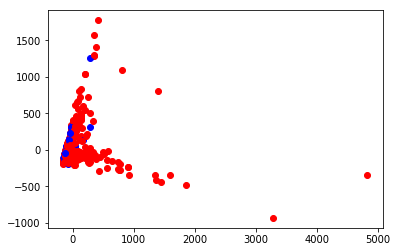

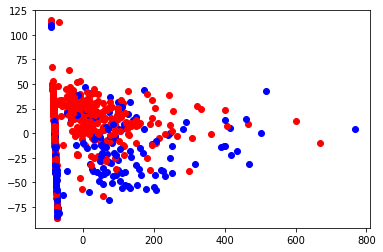

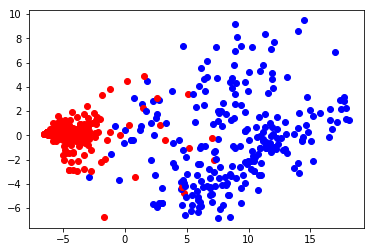

In [13]:
for i in range(3):
    plot_pca(data[i],target[i])

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]
data_names=["Liver Disorder","Diabetes","Breast Cancer"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear"),
    SVC(kernel="rbf"),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [15]:
for j in range(3):
    print(data_names[j])
    for i in list(range(len(classifiers))):
        X_train,X_test,y_train,y_test=train_test_split(data[j],target[j],test_size=.25,random_state=42)
        clf=classifiers[i]
        clf.fit(X_train,y_train)
        print("For ",names[i]," accuracy is ",accuracy_score(clf.predict(X_test),y_test))

Liver Disorder
For  Nearest Neighbors  accuracy is  0.6137931034482759
For  Linear SVM  accuracy is  0.6413793103448275
For  RBF SVM  accuracy is  0.6482758620689655
For  Gaussian Process  accuracy is  0.7103448275862069
For  Decision Tree  accuracy is  0.6551724137931034
For  Random Forest  accuracy is  0.6551724137931034
For  Neural Net  accuracy is  0.6413793103448275
For  AdaBoost  accuracy is  0.6620689655172414
For  Naive Bayes  accuracy is  0.6
For  QDA  accuracy is  0.6068965517241379
Diabetes
For  Nearest Neighbors  accuracy is  0.640625
For  Linear SVM  accuracy is  0.7291666666666666
For  RBF SVM  accuracy is  0.640625
For  Gaussian Process  accuracy is  0.7239583333333334
For  Decision Tree  accuracy is  0.6979166666666666
For  Random Forest  accuracy is  0.7395833333333334
For  Neural Net  accuracy is  0.6614583333333334
For  AdaBoost  accuracy is  0.7239583333333334
For  Naive Bayes  accuracy is  0.734375
For  QDA  accuracy is  0.765625
Breast Cancer
For  Nearest Neighbor

C:\Users\rollaball\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [16]:
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

In [47]:
def single_layer(x,y,z):
    oenc=OneHotEncoder()
    d=oenc.fit_transform(y.reshape(-1, 1))
    d=np.array(d.todense())
    X_train,X_test,y_train,y_test=train_test_split(x,d,test_size=.25,random_state=42)
    X_tf=tf.placeholder(tf.float32,[None,x.shape[1]])
    y_tf=tf.placeholder(tf.float32,[None,d.shape[1]])
    W=tf.Variable(tf.zeros([x.shape[1],d.shape[1]]))
    b=tf.Variable(tf.zeros([d.shape[1]]))
    y_=tf.nn.softmax(tf.matmul(X_tf,W)+b)
    cross_entropy=tf.reduce_mean(-tf.reduce_sum(y_tf * tf.log(y_), reduction_indices=[1]))
    train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()
    for _ in range(1000):
        sess.run(train_step, feed_dict={X_tf: np.array(X_train), y_tf: y_train})
    correct_prediction = tf.equal(tf.argmax(y_tf,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(z,sess.run(accuracy, feed_dict={X_tf: X_test, y_tf: y_test}))

In [48]:
for i in range(3):
    single_layer(data[i],target[i],data_names[i])

Liver Disorder 0.6413793
Diabetes 0.640625
Breast Cancer 0.6023392


In [33]:
data_liver.shape[0]

579

In [51]:
def multi_layer(x,y,z):
    oenc=OneHotEncoder()
    d=oenc.fit_transform(y.reshape(-1, 1))
    d=np.array(d.todense())
    
    X_train,X_test,y_train,y_test=train_test_split(x,d,test_size=.25,random_state=42)
    
    X_tf=tf.placeholder(tf.float32,[None,x.shape[1]])
    y_tf=tf.placeholder(tf.float32,[None,d.shape[1]])
    
    l1_nodes=1000
    l2_nodes=1000
    l3_nodes=1000
    
    hidden_layer_1={'weights':tf.Variable(tf.random_normal([x.shape[1],l1_nodes])),'bias':tf.Variable(tf.random_normal([l1_nodes]))}
    hidden_layer_2={'weights':tf.Variable(tf.random_normal([l1_nodes,l2_nodes])),'bias':tf.Variable(tf.random_normal([l2_nodes]))}
    hidden_layer_3={'weights':tf.Variable(tf.random_normal([l2_nodes,l3_nodes])),'bias':tf.Variable(tf.random_normal([l3_nodes]))}
    output_layer={'weights':tf.Variable(tf.random_normal([l3_nodes,d.shape[1]])),'bias':tf.Variable(tf.random_normal([d.shape[1]]))}
    
    l1=tf.add(tf.matmul(X_tf,hidden_layer_1['weights']),hidden_layer_1['bias'])
    l1=tf.nn.relu(l1)
    l2=tf.add(tf.matmul(l1,hidden_layer_2['weights']),hidden_layer_2['bias'])
    l2=tf.nn.relu(l2)
    l3=tf.add(tf.matmul(l2,hidden_layer_3['weights']),hidden_layer_3['bias'])
    l3=tf.nn.relu(l3)
    output=tf.add(tf.matmul(l1,output_layer['weights']),output_layer['bias'])

    cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output,labels=y_tf))
    y_=tf.nn.softmax(output)
    cross_entropy=tf.reduce_mean(-tf.reduce_sum(y_tf * tf.log(y_), reduction_indices=[1]))
    optimizer=tf.train.AdamOptimizer().minimize(cost)
    #optimizer=tf.train.AdamOptimizer().minimize(cost)
    sess=tf.InteractiveSession()
    sess.run(tf.global_variables_initializer())
    for _ in range(1000):
        sess.run(optimizer, feed_dict={X_tf: X_train, y_tf:y_train})

    correct_prediction = tf.equal(tf.argmax(y_tf,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(z,sess.run(accuracy, feed_dict={X_tf: X_test, y_tf: y_test}))

In [52]:
for i in range(3):
    multi_layer(data[i],target[i],data_names[i])

Liver Disorder 0.64827585
Diabetes 0.6770833
Breast Cancer 0.91812867


In [42]:
target[1].shape

(768,)